In [15]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

These exercises are meant to train you in applying the Pathwise and LRM method for Greeks.
We remain in the Black-Scholes model in order to have a correct answer compare with. This
exercise is still worth doing as the conclusions will mostly generalize to more general settings
where the true/analytical solutions are not available.

Throughout both exercises assume that you have a Black-Scholes model with $\sigma=0.3,S_0=100$, options have expiry $T=1$ and $r=0.03$. In each question, simulate a minimum of $100,000$ realizations.

In [1]:
sigma = 0.3
spot = 100
maturity = 1
rate = 0.03

# Exercise 1

## 1.1
*Calculate estimates of the delta of a call-option using the pathwise method and the
LRM method for a suitable number strikes ranging from 70 to 140. Plot the result in
one graph that also includes the true/analytical delta.*

Analytical:
$$
\Delta_t = e^{-q(T-t)}\Phi(d_1) = \Phi(d_1)
$$
where 
$$
d_1 = \frac{\ln(S/K) + (r-q+\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}
$$

In [20]:
strikes = range(70, 141, 1)

### Analytical

Text(0.5, 1.0, 'Analytical')

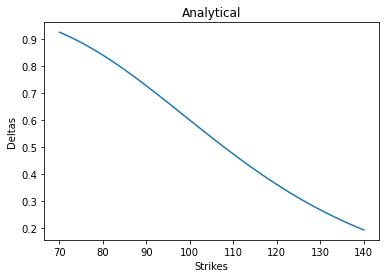

In [19]:
denom = sigma*np.sqrt(maturity)
term = (rate + 0.5*sigma**2)*maturity + np.log(spot)
analytical_deltas = []

for strike in strikes:
    analytical_deltas.append(norm.cdf((term - np.log(strike)) / denom))

plt.plot(strikes, analytical_deltas)
plt.xlabel('Strikes')
plt.ylabel('Deltas')
plt.title('Analytical')

### Pathwise

Text(0.5, 1.0, 'Pathwise')

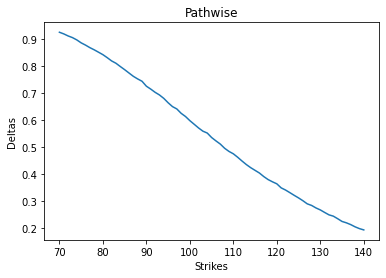

In [34]:
spot_paths_factor = spot*np.exp((rate - 0.5*sigma**2)*maturity)

pathwise_deltas = []
for strike in strikes:
    # spotPaths = spot*np.exp((rate - 0.5*sigma**2)*maturity + sigma*np.sqrt(maturity)*np.random.normal(size=100000))
    spot_paths = spot_paths_factor * np.exp(sigma*np.sqrt(maturity)*np.random.normal(size=100000))
    delta_paths = np.exp(-rate * maturity) * (spot_paths > strike) * spot_paths / spot
    pathwise_deltas.append(np.mean(delta_paths))

plt.plot(strikes, pathwise_deltas)
plt.xlabel('Strikes')
plt.ylabel('Deltas')
plt.title('Pathwise')

### LRM

Text(0.5, 1.0, 'LRM')

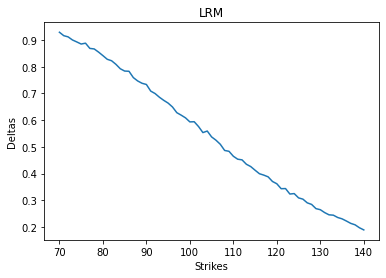

In [44]:
spot_paths_factor = spot*np.exp((rate - 0.5*sigma**2)*maturity)

LRM_paths = []
for strike in strikes:
    normals = np.random.normal(size=100000)
    spot_paths = spot_paths_factor * np.exp(sigma * np.sqrt(maturity) * normals)
    delta_paths = np.exp(-rate * maturity) * np.where(spot_paths > strike, spot_paths - strike, 0) * normals / (sigma * np.sqrt(maturity) * spot)
    LRM_paths.append(np.mean(delta_paths))

plt.plot(strikes, LRM_paths)
plt.xlabel('Strikes')
plt.ylabel('Deltas')
plt.title('LRM')


Text(0, 0.5, 'Deltas')

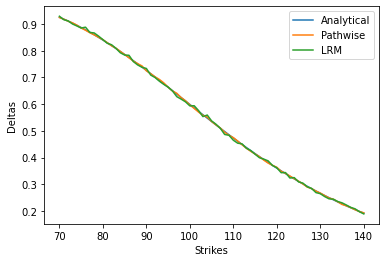

In [52]:
plt.plot(strikes, analytical_deltas)
plt.plot(strikes, pathwise_deltas)
plt.plot(strikes, LRM_paths)
plt.legend(['Analytical', 'Pathwise', 'LRM'])
plt.xlabel('Strikes')
plt.ylabel('Deltas')

## 1.2
*Draw a similar graph that plots the variance (per replication) of the pathwise method
and the LRM method across the same set of strikes. Which method is best? (Obviously
the analytical formula, but as stated above, that not really the point here)*

Text(0, 0.5, 'Variances')

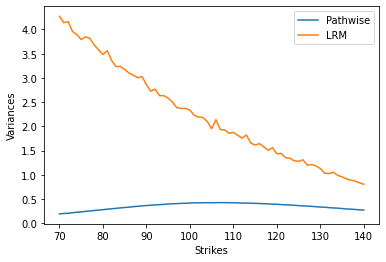

In [54]:
spot_paths_factor = spot*np.exp((rate - 0.5*sigma**2)*maturity)

pathwise_delta_variance = []
for strike in strikes:
    spot_paths = spot_paths_factor * np.exp(sigma*np.sqrt(maturity)*np.random.normal(size=100000))
    delta_paths = np.exp(-rate * maturity) * (spot_paths > strike) * spot_paths / spot
    pathwise_delta_variance.append(np.var(delta_paths))

LRM_variance = []
for strike in strikes:
    normals = np.random.normal(size=100000)
    spot_paths = spot_paths_factor * np.exp(sigma * np.sqrt(maturity) * normals)
    delta_paths = np.exp(-rate * maturity) * np.where(spot_paths > strike, spot_paths - strike, 0) * normals / (sigma * np.sqrt(maturity) * spot)
    LRM_variance.append(np.var(delta_paths))

plt.plot(strikes, pathwise_delta_variance)
plt.plot(strikes, LRM_variance)
plt.legend(['Pathwise', 'LRM'])
plt.xlabel('Strikes')
plt.ylabel('Variances')

The best one (other than the analytical) seems to be the pathwise method due to it's vastly lower variance. This was expected, as this is generally the case.

## 1.3
*Repeat the previous question using antithetic sampling as variance reduction technique.
Is there a significant reduction in variance? Does this change your conclusion?*

Text(0, 0.5, 'Variances')

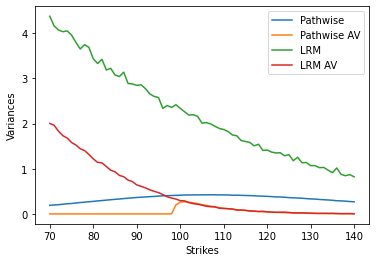

In [57]:

spot_paths_factor = spot*np.exp((rate - 0.5*sigma**2)*maturity)

pathwise_delta_variance_av = []
for strike in strikes:
    normals = np.random.normal(size=100000)
    spot_paths = spot_paths_factor * np.exp(sigma*np.sqrt(maturity) * normals)
    spot_paths_anti = spot_paths_factor * np.exp(sigma*np.sqrt(maturity) * (- normals))
    spot_paths_av = 0.5 * (spot_paths + spot_paths_anti)
    delta_paths = np.exp(-rate * maturity) * (spot_paths_av > strike) * spot_paths_av / spot
    pathwise_delta_variance_av.append(np.var(delta_paths))

LRM_variance_av = []
for strike in strikes:
    normals = np.random.normal(size=100000)
    spot_paths = spot_paths_factor * np.exp(sigma * np.sqrt(maturity) * normals)
    spot_paths_anti = spot_paths_factor * np.exp(sigma * np.sqrt(maturity) * (-normals))
    spot_paths_av = 0.5*(spot_paths + spot_paths_anti)
    delta_paths = np.exp(-rate * maturity) * np.where(spot_paths_av > strike, spot_paths_av - strike, 0) * normals / (sigma * np.sqrt(maturity) * spot)
    LRM_variance_av.append(np.var(delta_paths))

plt.plot(strikes, pathwise_delta_variance)
plt.plot(strikes, pathwise_delta_variance_av)
plt.plot(strikes, LRM_variance)
plt.plot(strikes, LRM_variance_av)
plt.legend(['Pathwise', 'Pathwise AV', 'LRM', 'LRM AV'])
plt.xlabel('Strikes')
plt.ylabel('Variances')

## 1.4
*Repeat question 1)+2) but do so for the Vega instead of the delta.*

### Analytical
$$
\nu = \frac{\partial C_t}{\partial \sigma} = S_t \phi(d_1)\sqrt{T-t}
$$

### Pathwise
$$
\hat{\nu} = \mathbb{E} [e^{-rT}(-\sigma T + \sqrt{T}Z)S_T 1_{\{S_T > K\}}]
$$

Text(0, 0.5, 'Vegas')

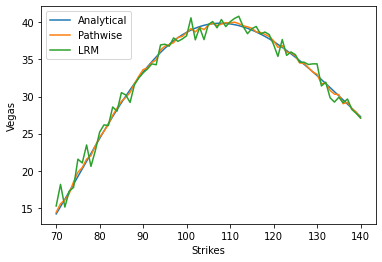

In [69]:
denom = sigma*np.sqrt(maturity)
term = (rate + 0.5*sigma**2)*maturity + np.log(spot)
spot_paths_factor = spot*np.exp((rate - 0.5*sigma**2)*maturity)
analytical_vegas = []
pathwise_vegas = []
LRM_vegas = []

for strike in strikes:
    analytical_vegas.append(spot * norm.pdf((term - np.log(strike)) / denom) * np.sqrt(maturity))

    normals = np.random.normal(size=100000)
    spot_paths = spot_paths_factor * np.exp(sigma*np.sqrt(maturity)*normals)

    vega_paths = np.exp(-rate * maturity) * (-sigma * maturity + np.sqrt(maturity) * normals) * spot_paths * (spot_paths > strike)
    pathwise_vegas.append(np.mean(vega_paths))

    vega_paths = np.exp(-rate * maturity) * np.where(spot_paths > strike, spot_paths - strike, 0) * ((np.power(normals,2) - 1) / sigma - normals * np.sqrt(maturity))
    LRM_vegas.append(np.mean(vega_paths))

plt.plot(strikes, analytical_vegas) 
plt.plot(strikes, pathwise_vegas)
plt.plot(strikes, LRM_vegas)
plt.legend(['Analytical', 'Pathwise', 'LRM'])
plt.xlabel('Strikes')
plt.ylabel('Vegas')


Text(0, 0.5, 'Variance')

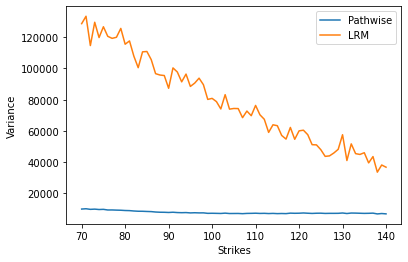

In [73]:

denom = sigma*np.sqrt(maturity)
term = (rate + 0.5*sigma**2)*maturity + np.log(spot)
spot_paths_factor = spot*np.exp((rate - 0.5*sigma**2)*maturity)
pathwise_vegas_variance = []
LRM_vegas_variance = []

for strike in strikes:
    normals = np.random.normal(size=100000)
    spot_paths = spot_paths_factor * np.exp(sigma*np.sqrt(maturity)*normals)

    vega_paths = np.exp(-rate * maturity) * (-sigma * maturity + np.sqrt(maturity) * normals) * spot_paths * (spot_paths > strike)
    pathwise_vegas_variance.append(np.var(vega_paths))

    vega_paths = np.exp(-rate * maturity) * np.where(spot_paths > strike, spot_paths - strike, 0) * ((np.power(normals,2) - 1) / sigma - normals * np.sqrt(maturity))
    LRM_vegas_variance.append(np.var(vega_paths))

plt.plot(strikes, pathwise_vegas_variance)
plt.plot(strikes, LRM_vegas_variance)
plt.legend(['Pathwise', 'LRM'])
plt.xlabel('Strikes')
plt.ylabel('Variance')


# Exercise 2
Consider now a digital option. Since the pathwise estimator is not applicable one method that can be used is to approximate the payoff using
$$
1_{x>K}\approx f_{\epsilon}(x) = \min\left(1, \max\left(0, \frac{x-K+\epsilon}{2\epsilon} \right) \right)
$$
Note that the approximation can be made "infinitely accurate" by letting $\epsilon$ approach zero.

## 2.1
*Asses whether this is an appropriate approximation by plotting deltas across the same
strikes as in 1.1. In particular, plot the true/analytical delta of the digital, as well as
the one calculated using the pathwise method applied to the payoff $f_\epsilon(x)$. Do the latter
for the two cases, $\epsilon=0.5$ and $\epsilon=30$. Describe what you see?*

Analytical:
$$
C_t = e^{-r(T-t)}\Phi(d_2) \Rightarrow
$$
$$
\Delta = \frac{\partial C_t}{\partial S_t} = \frac{e^{-r(T-t)}\phi(d_2)}{\sigma S_t \sqrt{T-t}}
$$

Text(0.5, 1.0, 'Digital')

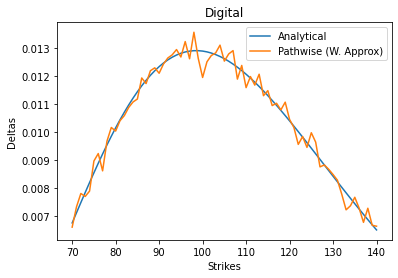

In [93]:
spot_paths_factor = spot*np.exp((rate - 0.5*sigma**2)*maturity)
dig_analytical_deltas = []
dig_pathwise_deltas = []

epsilon = 0.5

for strike in strikes:
    d2 = (np.log(spot / strike) + (rate + 0.5*sigma**2)) / (sigma * np.sqrt(maturity)) - sigma * np.sqrt(maturity)
    delta = np.exp(-rate*maturity) * norm.pdf(d2) / (sigma * spot * np.sqrt(maturity))
    dig_analytical_deltas.append(delta)

    normals = np.random.normal(size=100000)
    spot_paths = spot_paths_factor * np.exp(sigma*np.sqrt(maturity)*normals)
    delta_paths = np.exp(-rate * maturity) * (np.abs(spot_paths - strike) < epsilon) / (2*epsilon) * spot_paths / spot
    dig_pathwise_deltas.append(np.mean(delta_paths))

plt.plot(strikes, dig_analytical_deltas)
plt.plot(strikes, dig_pathwise_deltas)
plt.legend(['Analytical', 'Pathwise (W. Approx)'])
plt.xlabel('Strikes')
plt.ylabel('Deltas')
plt.title('Digital')

## 2.2
*Do the same but using the pure LRM and the mixed method with $\epsilon=30$ (see slides p. 69)*

Text(0.5, 1.0, 'Digital')

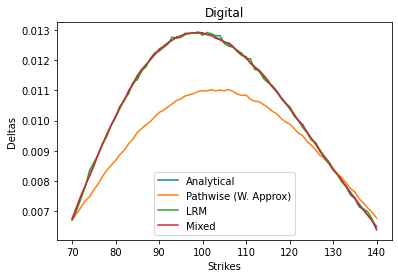

In [103]:
spot_paths_factor = spot*np.exp((rate - 0.5*sigma**2)*maturity)
dig_analytical_deltas = []
dig_pathwise_deltas = []
dig_LRM_deltas = []
dig_mixed_deltas = []

epsilon = 30

for strike in strikes:
    d2 = (np.log(spot / strike) + (rate + 0.5*sigma**2)) / (sigma * np.sqrt(maturity)) - sigma * np.sqrt(maturity)
    delta = np.exp(-rate*maturity) * norm.pdf(d2) / (sigma * spot * np.sqrt(maturity))
    dig_analytical_deltas.append(delta)

    normals = np.random.normal(size=100000)
    spot_paths = spot_paths_factor * np.exp(sigma*np.sqrt(maturity)*normals)

    # Pathwise
    delta_paths = np.exp(-rate * maturity) * (np.abs(spot_paths - strike) < epsilon) / (2*epsilon) * spot_paths / spot
    dig_pathwise_deltas.append(np.mean(delta_paths))

    # LRM
    delta_paths = np.exp(-rate * maturity) * (spot_paths > strike) * normals / (sigma * np.sqrt(maturity) * spot)
    dig_LRM_deltas.append(np.mean(delta_paths))

    # Mixed Method
    fraction = (spot_paths - strike + epsilon) / (2 * epsilon)
    h_eps = (spot_paths > strike) - np.fmin(np.ones_like(fraction), np.fmax(np.zeros_like(fraction), fraction))
    delta_paths = np.exp(-rate * maturity) * ((np.abs(spot_paths - strike) < epsilon) / (2* epsilon) * spot_paths / spot + h_eps * normals/(sigma * np.sqrt(maturity) * spot))
    dig_mixed_deltas.append(np.mean(delta_paths))

plt.plot(strikes, dig_analytical_deltas)
plt.plot(strikes, dig_pathwise_deltas)
plt.plot(strikes, dig_LRM_deltas)
plt.plot(strikes, dig_mixed_deltas)
plt.legend(['Analytical', 'Pathwise (W. Approx)', 'LRM', 'Mixed'])
plt.xlabel('Strikes')
plt.ylabel('Deltas')
plt.title('Digital')

## 2.3
*Plot the variance (per replication) across strikes for the LRM the mixed method with $\epsilon=30$*

Text(0.5, 1.0, 'Digital')

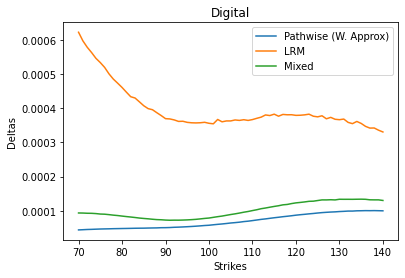

In [101]:
spot_paths_factor = spot*np.exp((rate - 0.5*sigma**2)*maturity)
dig_pathwise_deltas = []
dig_LRM_deltas = []
dig_mixed_deltas = []

epsilon = 30

for strike in strikes:
    normals = np.random.normal(size=100000)
    spot_paths = spot_paths_factor * np.exp(sigma*np.sqrt(maturity)*normals)

    # Pathwise
    delta_paths = np.exp(-rate * maturity) * (np.abs(spot_paths - strike) < epsilon) / (2*epsilon) * spot_paths / spot
    dig_pathwise_deltas.append(np.var(delta_paths))

    # LRM
    delta_paths = np.exp(-rate * maturity) * (spot_paths > strike) * normals / (sigma * np.sqrt(maturity) * spot)
    dig_LRM_deltas.append(np.var(delta_paths))

    # Mixed Method
    fraction = (spot_paths - strike + epsilon) / (2 * epsilon)
    h_eps = (spot_paths > strike) - np.fmin(np.ones_like(fraction), np.fmax(np.zeros_like(fraction), fraction))
    delta_paths = np.exp(-rate * maturity) * ((np.abs(spot_paths - strike) < epsilon) / (2* epsilon) * spot_paths / spot + h_eps * normals/(sigma * np.sqrt(maturity) * spot))
    dig_mixed_deltas.append(np.var(delta_paths))

plt.plot(strikes, dig_pathwise_deltas)
plt.plot(strikes, dig_LRM_deltas)
plt.plot(strikes, dig_mixed_deltas)
plt.legend(['Pathwise (W. Approx)', 'LRM', 'Mixed'])
plt.xlabel('Strikes')
plt.ylabel('Deltas')
plt.title('Digital')